# Загрузка данных

Ссылка на датасет, который мы используем:

https://www.kaggle.com/c/kaggle-survey-2020/data

In [ ]:
from google.colab import files
uploaded = files.upload()

TypeError: ignored

# Библиотеки


In [ ]:
import pandas as pd
import missingno as missingno
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median

# Извлечение данных

In [ ]:
data = pd.read_csv("kaggle_survey_2020_responses.csv", sep=",")
data.head(10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool.

С помощью функции shape было определено, что у нас 20036 записей с 355 колонками. В первой строке расписаны вопросы, которые были заданы участникам опроса.

In [ ]:
data[1:].shape

(20036, 355)

# Заспамленность данных

Оказалось, что 365 участников не с чистой совестью подошли к ответам на опросник. Они потратили меньше 1 минуты для того, чтобы ответить на 35 вопросов. 

Самое быстрое время, потраченное на ответы на вопросы, - 20 секунд.

Самое медленное время, потраченное на ответы на вопросы - 318 часов (почти 2 недели.)

In [ ]:
spam_data = data[1:]
spam_data['Time'] = spam_data['Time from Start to Finish (seconds)'].astype(int)
spam_data.rename(columns={"Q24": "Salary", "Q1": 'Age', "Q2": 'Gender', "Q3": 'Country', 'Q4': 'Education', "Q5": 'Role/Profession', 'Q6': 'XP'}, inplace=True)
spam_data = spam_data[['Time', 'Age', 'Gender', 'Country', 'Education', 'Role/Profession', 'Salary', 'XP']]
spam_data.loc[spam_data['Time'] <= 60]
arr = spam_data[spam_data['Time'] <= 60]
arr.sort_values(by=['Time'])
arr2 = spam_data
arr2.sort_values(by=['Time'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Time,Age,Gender,Country,Education,Role/Profession,Salary,XP
3599,20,22-24,Man,Spain,NaN,NaN,NaN,NaN
11559,20,22-24,Woman,Canada,NaN,NaN,NaN,NaN
18876,21,22-24,Man,Israel,NaN,NaN,NaN,NaN
5744,22,35-39,Man,Belgium,Master’s degree,NaN,NaN,NaN
17665,23,35-39,Man,India,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
12884,1049933,25-29,Man,United States of America,Master’s degree,Data Scientist,"100,000-124,999",5-10 years
8835,1050699,22-24,Man,China,Some college/university study without earning ...,Data Analyst,"30,000-39,999",1-2 years
1214,1074069,55-59,Man,Saudi Arabia,Doctoral degree,Research Scientist,"50,000-59,999",5-10 years
15110,1104261,45-49,Man,France,Master’s degree,Product/Project Manager,"30,000-39,999",20+ years


Участники, которые толком не отвечали на вопросы, связанные с МЛ.

In [ ]:
spam_data = data[1:]
skipped = spam_data.iloc[:, 7:]
only_answer_demographic = ((skipped == 'None') | skipped.isnull()).all(axis=1)
spam_data.rename(columns={"Q24": "Salary", "Q1": 'Age', "Q2": 'Gender', "Q3": 'Country', 'Q4': 'Education', "Q5": 'Role/Profession', 'Q6': 'XP'}, inplace=True)
spam_data = spam_data[[ 'Age', 'Gender', 'Country', 'Education', 'Role/Profession', 'Salary', 'XP']]
spam_data[only_answer_demographic]

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,Gender,Country,Education,Role/Profession,Salary,XP
47,18-21,Man,India,Professional degree,NaN,NaN,NaN
54,40-44,Man,Germany,Doctoral degree,NaN,NaN,NaN
99,25-29,Woman,Other,Doctoral degree,NaN,NaN,NaN
112,50-54,Man,Argentina,Doctoral degree,NaN,NaN,NaN
123,50-54,Man,Japan,Master’s degree,NaN,NaN,NaN
...,...,...,...,...,...,...,...
19954,18-21,Man,India,I prefer not to answer,Student,NaN,NaN
19961,55-59,Man,Australia,Professional degree,Research Scientist,NaN,NaN
19997,22-24,Man,Ghana,Bachelor’s degree,Student,NaN,NaN
20031,18-21,Man,India,Master’s degree,NaN,NaN,NaN


Здесь оказались респонденты, которые достигли возрастной отметки в 18-24 года и уже имеют 20 лет опыта работы. Немного странно, что люди могут начинать работать как минимум с 4 лет.

In [ ]:
spam_data = data[1:]
age_array = ['18-21', '22-24']
xp_array = ['< 1 years', 'NaN']
spam_data.rename(columns={"Q24": "Salary", "Q1": 'Age', "Q2": 'Gender', "Q3": 'Country', 'Q4': 'Education', "Q5": 'Role/Profession', 'Q6': 'XP'}, inplace=True)
spam_data = spam_data[[ 'Age', 'Gender', 'Country', 'Education', 'Role/Profession', 'Salary', 'XP']]
spam_data[spam_data['Age'].isin(age_array) & spam_data['XP'].isin(xp_array)]

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,Gender,Country,Education,Role/Profession,Salary,XP
10,22-24,Man,China,No formal education past high school,Student,NaN,< 1 years
13,22-24,Man,Indonesia,Bachelor’s degree,Student,NaN,< 1 years
34,18-21,Woman,India,Bachelor’s degree,Student,NaN,< 1 years
61,18-21,Woman,Indonesia,Bachelor’s degree,Data Scientist,$0-999,< 1 years
73,22-24,Woman,India,Master’s degree,Student,NaN,< 1 years
...,...,...,...,...,...,...,...
19966,22-24,Man,India,Bachelor’s degree,Student,NaN,< 1 years
19977,18-21,Man,India,Some college/university study without earning ...,Student,NaN,< 1 years
20000,18-21,Man,India,Bachelor’s degree,Business Analyst,NaN,< 1 years
20008,22-24,Woman,India,Master’s degree,Software Engineer,"5,000-7,499",< 1 years


In [ ]:
6 участников возраста 18-21 и 22024 лет уже зарабатывают огромное количество денег, а именно больше 300.000 долларов США.

In [ ]:
spam_data = data[1:]
age_array = ['18-21', '22-24']
salary_array = ['300,000-500,000', '> $500,000 ']
spam_data.rename(columns={"Q24": "Salary", "Q1": 'Age', "Q2": 'Gender', "Q3": 'Country', 'Q4': 'Education', "Q5": 'Role/Profession'}, inplace=True)
spam_data = spam_data[[ 'Age', 'Gender', 'Country', 'Education', 'Role/Profession', 'Salary']]
spam_data[spam_data['Age'].isin(age_array) & spam_data['Salary'].isin(salary_array)]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,Gender,Country,Education,Role/Profession,Salary
544,18-21,Man,India,Bachelor’s degree,Data Scientist,"300,000-500,000"
2039,18-21,Man,United States of America,Bachelor’s degree,Data Scientist,"300,000-500,000"
9575,22-24,Woman,Japan,Professional degree,Data Scientist,"300,000-500,000"
9577,22-24,Man,India,Some college/university study without earning ...,Machine Learning Engineer,"300,000-500,000"
16559,22-24,Man,India,Bachelor’s degree,Software Engineer,"300,000-500,000"
16759,18-21,Man,Russia,Bachelor’s degree,Machine Learning Engineer,"300,000-500,000"


6 участников получают свыше 300.000 долларов США при опыте работы меньше чем 1 год.

In [ ]:
spam_data = data[1:]
salary_array = ['300,000-500,000', '> $500,000 ']
xp_array = ['< 1 years', 'NaN']
spam_data.rename(columns={"Q24": "Salary", "Q1": 'Age', "Q2": 'Gender', "Q3": 'Country', 'Q4': 'Education', "Q5": 'Role/Profession', 'Q6': 'XP'}, inplace=True)
spam_data = spam_data[[ 'Age', 'Gender', 'Country', 'Education', 'Role/Profession', 'Salary', 'XP']]
spam_data[spam_data['Salary'].isin(salary_array) & spam_data['XP'].isin(xp_array)]

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,Gender,Country,Education,Role/Profession,Salary,XP
544,18-21,Man,India,Bachelor’s degree,Data Scientist,"300,000-500,000",< 1 years
4117,40-44,Man,Other,Master’s degree,Other,"300,000-500,000",< 1 years
11299,40-44,Man,United States of America,Master’s degree,Other,"300,000-500,000",< 1 years
16759,18-21,Man,Russia,Bachelor’s degree,Machine Learning Engineer,"300,000-500,000",< 1 years
19764,50-54,Man,United States of America,Professional degree,Other,"300,000-500,000",< 1 years


# Анализ данных

Все параметры являются нечисловыми. Все 355 колонок.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20037 entries, 0 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.3+ MB


Все колонки:

In [ ]:
data.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20037 entries, 0 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.3+ MB


Ниже представлены все нулевые значения в данном датасете.

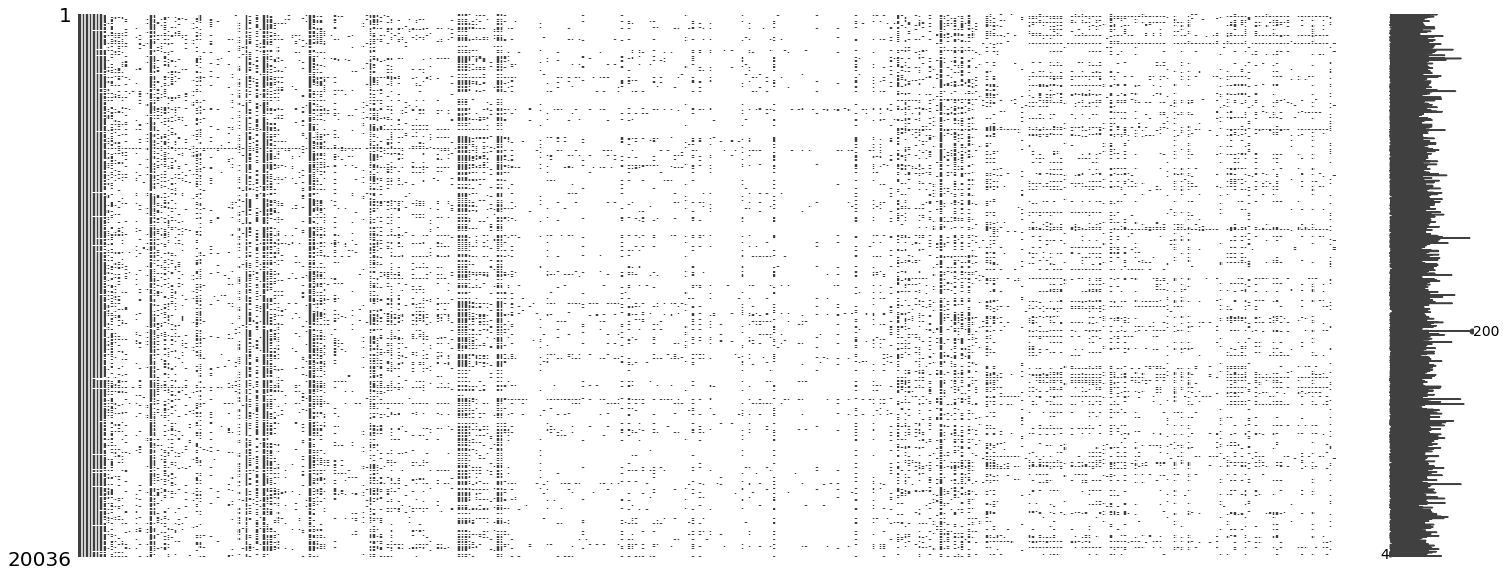

In [ ]:
clean_data = data[1:]
if len(clean_data[clean_data.isnull().any(axis=1)] != 0):
    missingno.matrix(clean_data)
    plt.show()

Проверяем дубликаты записей.

In [ ]:
dupl_data = clean_data[clean_data.duplicated(keep=False)]
print(len(dupl_data))


35



Дубликаты присутствуют, ниже указано их количество.

In [ ]:
if len(clean_data[clean_data.duplicated()]) > 0:
    print("Количество дупликатов ", len(clean_data[clean_data.duplicated()]))
    print(clean_data[clean_data.duplicated(keep=False)].sort_values(by=list(clean_data.columns)).head())
else:
    print("Нет дубликатов записей")

Количество дупликатов  19
      Time Age Group   Q2  ... Q35_B_Part_9 Q35_B_Part_10 Q35_B_OTHER
4487    28     18-21  Man  ...          NaN           NaN         NaN
4781    28     18-21  Man  ...          NaN           NaN         NaN
6792    28     18-21  Man  ...          NaN           NaN         NaN
4337    33     22-24  Man  ...          NaN           NaN         NaN
4878    33     22-24  Man  ...          NaN           NaN         NaN

[5 rows x 355 columns]


In [ ]:
for col in clean_data.columns:
  print(f"{col}:\n{clean_data[col].value_counts(dropna=False)}\n")

Time from Start to Finish (seconds):
565     34
493     31
614     31
478     30
641     30
        ..
4227     1
4224     1
2785     1
4217     1
3591     1
Name: Time from Start to Finish (seconds), Length: 5167, dtype: int64

Q1:
25-29    4011
22-24    3786
18-21    3469
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

Q2:
Man                        15789
Woman                       3878
Prefer not to say            263
Prefer to self-describe       54
Nonbinary                     52
Name: Q2, dtype: int64

Q3:
India                                                   5851
United States of America                                2237
Other                                                   1388
Brazil                                                   694
Japan                                                    638
Russia                                                   582
United Kingdom of Great Br

Некоторые экмпериментальные диаграммы и графики. Основная их часть лучше будет рассмотерна в следующем разделе.

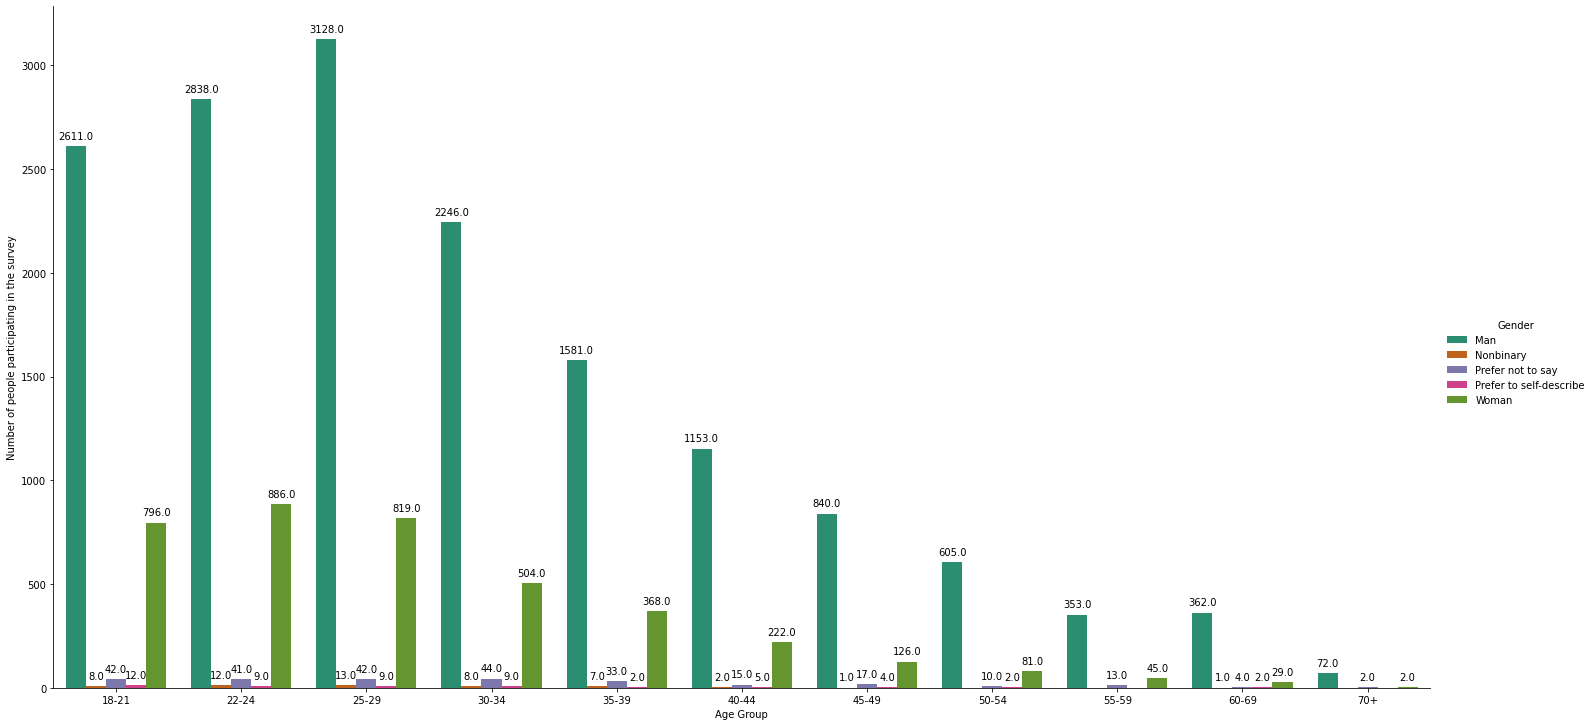

In [ ]:
grouped_age_gender = clean_data.groupby(['Q1', 'Q2'])['Q2'].count().reset_index(name='Number of people participating in the survey')
grouped_age_gender.rename(columns={"Q1":"Age Group","Q2":"Gender"},inplace=True)
graph = sns.catplot(data=grouped_age_gender, kind='bar',x="Age Group", y="Number of people participating in the survey", hue="Gender", palette='Dark2', height=10, aspect=2)
for ax in graph.axes.ravel():
  for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

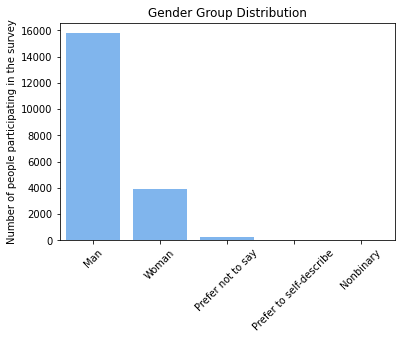

In [ ]:
sns.barplot(x=clean_data.Q2.value_counts().index, 
            y=clean_data.Q2.value_counts(), color='#6EB5FF')
plt.ylabel('Number of people participating in the survey')
plt.title('Gender Group Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
data_copy = data[1:]
grouped_data=data_copy.groupby(['Q2','Q5'])['Q2'].count().reset_index(name='Count')
grouped_data

,Q2,Q5,Count
0,Man,Business Analyst,627
1,Man,Currently not employed,1235
2,Man,DBA/Database Engineer,103
3,Man,Data Analyst,1110
4,Man,Data Engineer,369
...,...,...,...
56,Woman,Product/Project Manager,78
57,Woman,Research Scientist,239
58,Woman,Software Engineer,260
59,Woman,Statistician,69


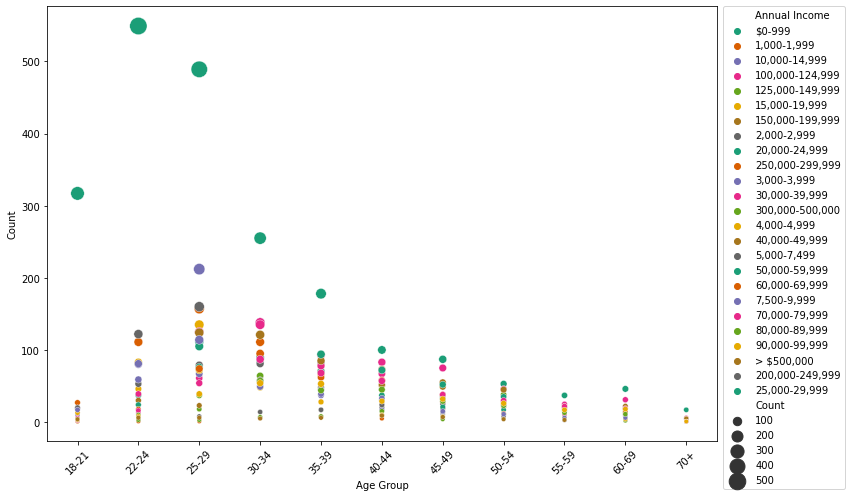

In [ ]:
clean_data = data[1:]
grouped_age_income = clean_data.groupby(['Q1', 'Q24'])['Q24'].count().reset_index(name='Count')
grouped_age_income.rename(columns={"Q1":"Age Group","Q24":"Annual Income"},inplace=True)
grouped_age_income
plt.figure(figsize=(12,8))
sns.scatterplot(data=grouped_age_income, x="Age Group", y="Count", size="Count", hue="Annual Income", palette='Dark2', sizes=(20, 300))
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xticks(rotation=45)
plt.show()


количество времени от возраста

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


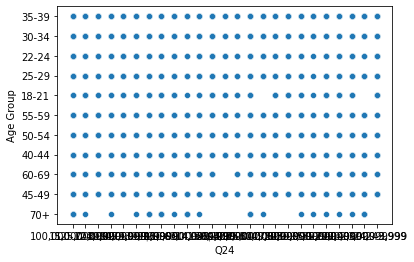

In [ ]:
clean_data = data[1:]
clean_data.rename(columns={"Time from Start to Finish (seconds)":"Time","Q1": "Age Group"},inplace=True)
clean_data['Time'] = clean_data['Time'].apply(lambda x: int(str(x)))
sns.scatterplot(data=clean_data, y="Age Group", x="Q24")


In [ ]:
clean_data = data[1:]
data_countries_time = clean_data[['Time from Start to Finish (seconds)','Q3']]
data_countries_time['Time from Start to Finish (seconds)'] = data_countries_time['Time from Start to Finish (seconds)'].astype(int)
data_countries_time = data_countries_time.groupby('Q3', as_index=False).mean()
data_countries_time['Average time in hours'] = data_countries_time['Time from Start to Finish (seconds)'].apply(lambda a: a/3600)
data_countries_time = data_countries_time.sort_values(by='Average time in hours',ascending=False).head(10)
data_countries_time

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Q3,Time from Start to Finish (seconds),Average time in hours
35,Republic of Korea,36433.302632,10.120362
47,Thailand,21277.946970,5.910541
38,Saudi Arabia,21140.907895,5.872474
36,Romania,19229.344262,5.341485
41,South Korea,19160.868421,5.322463
23,Malaysia,18579.804511,5.161057
48,Tunisia,17852.626263,4.959063
10,Egypt,17452.810056,4.848003
30,Pakistan,16488.664311,4.580185
46,Taiwan,15131.868914,4.203297


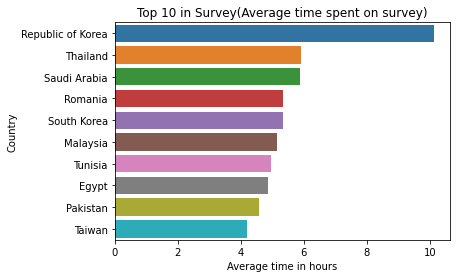

In [ ]:
data_countries_time.rename(columns={"Q3":"Country"},inplace=True)
ax = sns.barplot(x=data_countries_time['Average time in hours'], y=data_countries_time['Country'])
ax.set_title("Top 10 in Survey(Average time spent on survey)")
plt.show()

# Предварительный анализ зависимостей в QlikView
Был проведён анализ основных факторов, влияющих на доход (компенсацию) участников опроса. В сравнении участвовали 1, 2, 3, 4, 5, 6, 7, 15, 20 и 25 вопросы.
Перед сравнением были отфильтрованы строки, в которых не указан доход участника. Также созданы столбцы, показывающие количество известных языков (поле "Other" расценивается как 1 язык) и "усреднённый" доход. Важно отметить, что, поскольку каждый участник указывает примерный диапазон, в котором лежит его доход, а не конкретное значение, в расчётах среднего дохода используется значение, лежащее в середине выбранного диапазона. Поэтому при анализе могут возникать большие погрешности. Особенно это заметно на крайних диапазонах.

# Новый раздел

In [ ]:
library(dplyr)

D = read.csv("kaggle_survey_2020_responses.csv", header = TRUE, sep = ",")
D = D[2:20037,]

D1 = select(D, matches("Q(15|20|24|25|[1-6]|(7.*))\\b", perl=TRUE))
D2 = subset(D1, D$Q24 != "")

D2$Q24S="0"
D2 = mutate(D2, Q24S = case_when(  D2$Q24 == "$0-999"          ~ "500", D2$Q24 == "1,000-1,999"     ~ "1500",  D2$Q24 == "4,000-4,999"     ~ "4500",  D2$Q24 == "7,500-9,999"     ~ "8750",  D2$Q24 == "10,000-14,999"   ~ "12500",  D2$Q24 == "15,000-19,999"   ~ "17500",  D2$Q24 == "20,000-24,999"   ~ "22500",  D2$Q24 == "25,000-29,999"   ~ "27500",  D2$Q24 == "30,000-39,999"   ~ "35000",  D2$Q24 == "40,000-49,999"   ~ "45000",  D2$Q24 == "50,000-59,999"   ~ "55000",  D2$Q24 == "60,000-69,999"   ~ "65000",  D2$Q24 == "70,000-79,999"   ~ "75000",  D2$Q24 == "80,000-89,999"   ~ "85000",  D2$Q24 == "90,000-99,999"   ~ "95000",  D2$Q24 == "100,000-124,999" ~ "112500",  D2$Q24 == "100,000-124,999" ~ "112500",  D2$Q24 == "125,000-149,999" ~ "137500",  D2$Q24 == "150,000-199,999" ~ "175000",  D2$Q24 == "200,000-249,999" ~ "225000",  D2$Q24 == "250,000-299,999" ~ "275000",  D2$Q24 == "300,000-500,000" ~ "400000",  D2$Q24 == "> $500,000"      ~ "500000"))
D2 = mutate(D2, Q25S = case_when(  D2$Q25 == "$0 ($USD)"          ~ "0", D2$Q25 == "$1-$99"     ~ "50",  D2$Q25 == "$100-$999"     ~ "500",  D2$Q25 == "$1000-$9,999"     ~ "5000",  D2$Q25 == "$10,000-$99,999"   ~ "50000",  D2$Q25 == "$100,000 or more ($USD)"   ~ "100000"))

D2$Q7N = as.numeric(D2$Q7_Part_1 != "") + as.numeric(D2$Q7_Part_2 != "") + as.numeric(D2$Q7_Part_3 != "") + as.numeric(D2$Q7_Part_4 != "") + as.numeric(D2$Q7_Part_5 != "") + as.numeric(D2$Q7_Part_6 != "") + as.numeric(D2$Q7_Part_7 != "") +as.numeric(D2$Q7_Part_8 != "") + as.numeric(D2$Q7_Part_9 != "") + as.numeric(D2$Q7_Part_10 != "") + as.numeric(D2$Q7_Part_11 != "") + as.numeric(D2$Q7_Part_12 != "") + as.numeric(D2$Q7_OTHER != "")

write.csv(D2, "responses_cut.csv", quote=TRUE)

Была создана среда, позволяющая легко просмотреть распределение доходов при заданном наборе условий.
Был проведён сравнительный анализ аналогичного опроса, датированного 2019 годом, для оценки влияния эпидемии на зарплаты и деятельность опрашиваемых.
В среднем зарплаты упали: гораздо больше ответов попадало в "0-999". Несмотря на то, что на программистов из-за удобства домашней работы это должно влиять меньше, разница хорошо заметна.
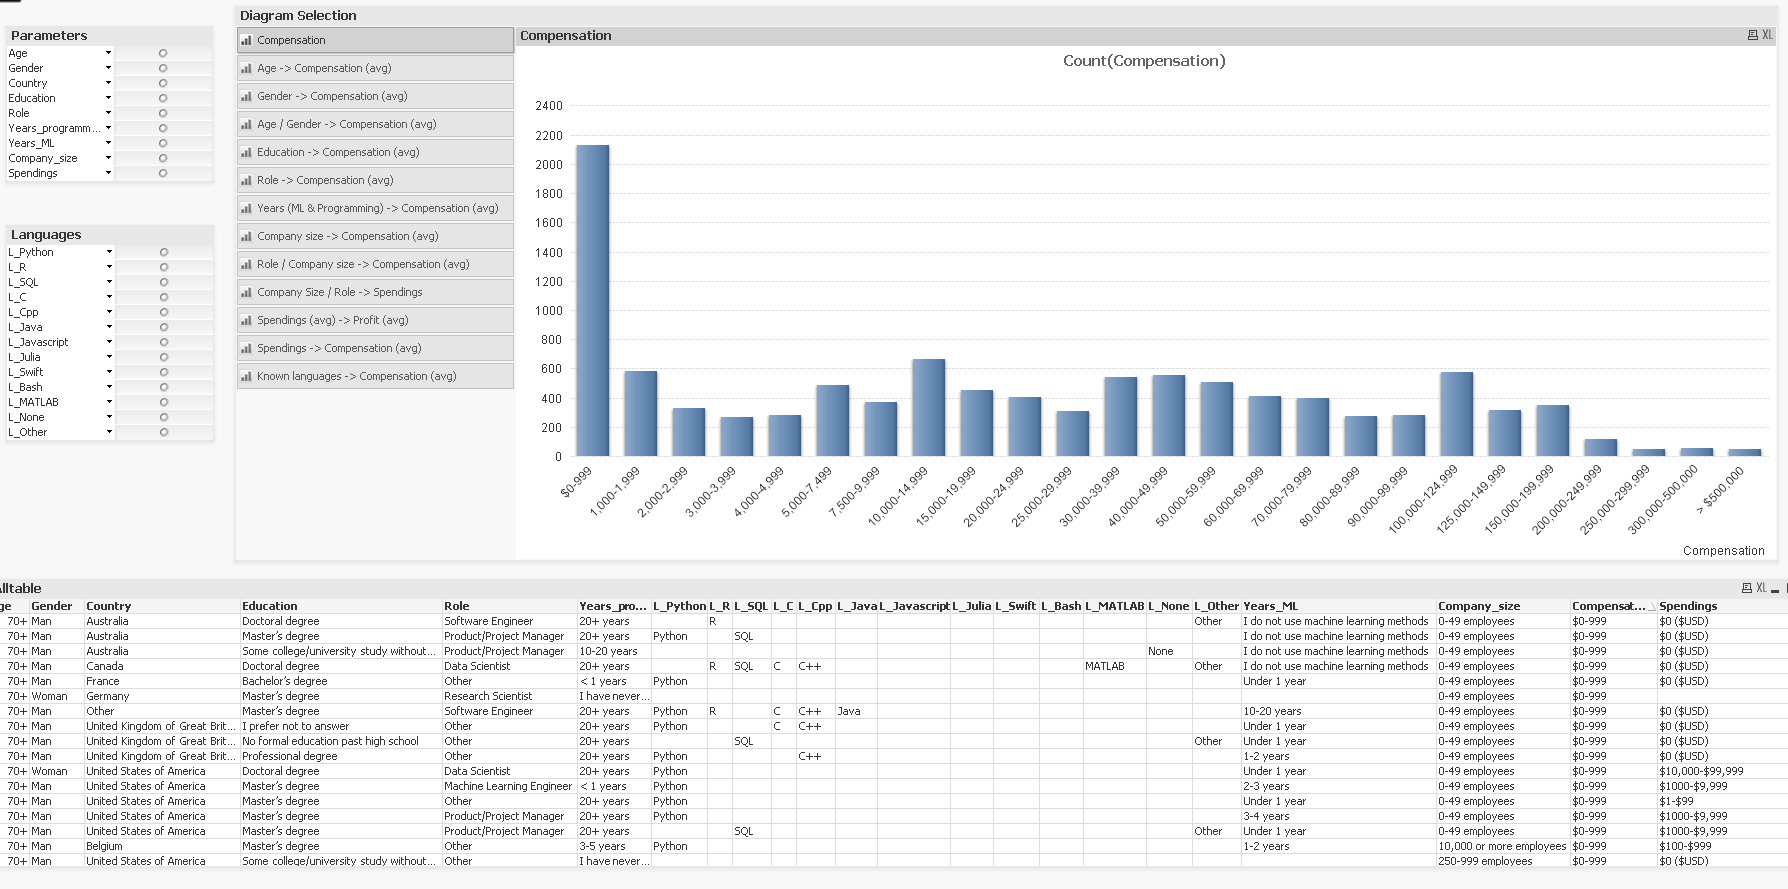



Зависимость дохода от возраста ожидаемая: доход растёт до 55-59 лет, далее идёт на спад (видимо, в Data Science немного пенсионеров).
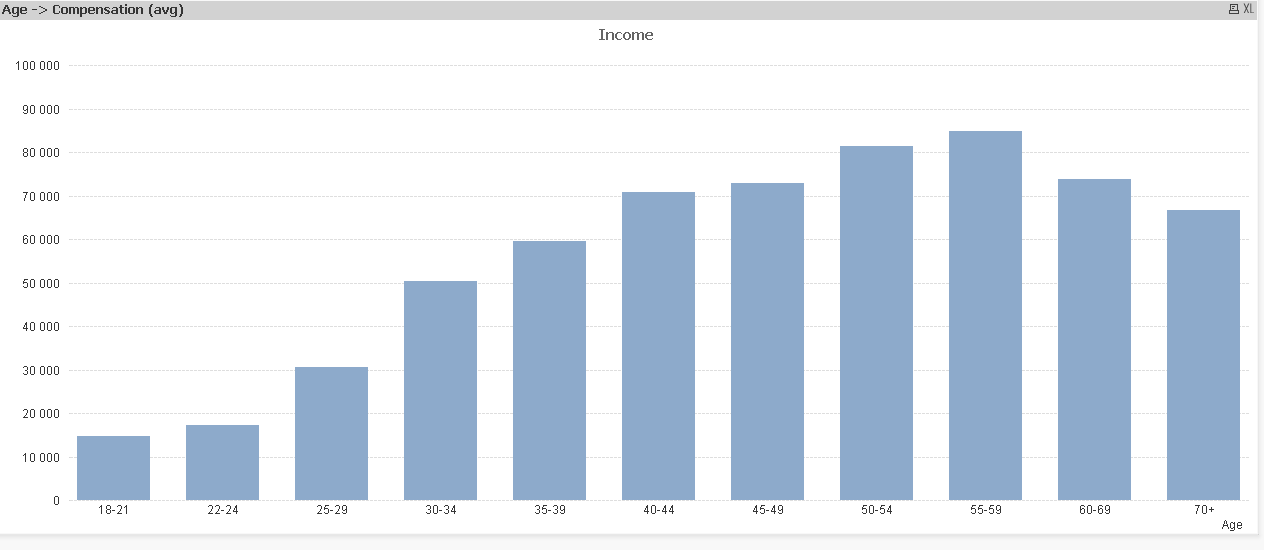

Люди с возрастом за 70 стали отдельным интересным примером. Общее распределение не очень обнадёживает,

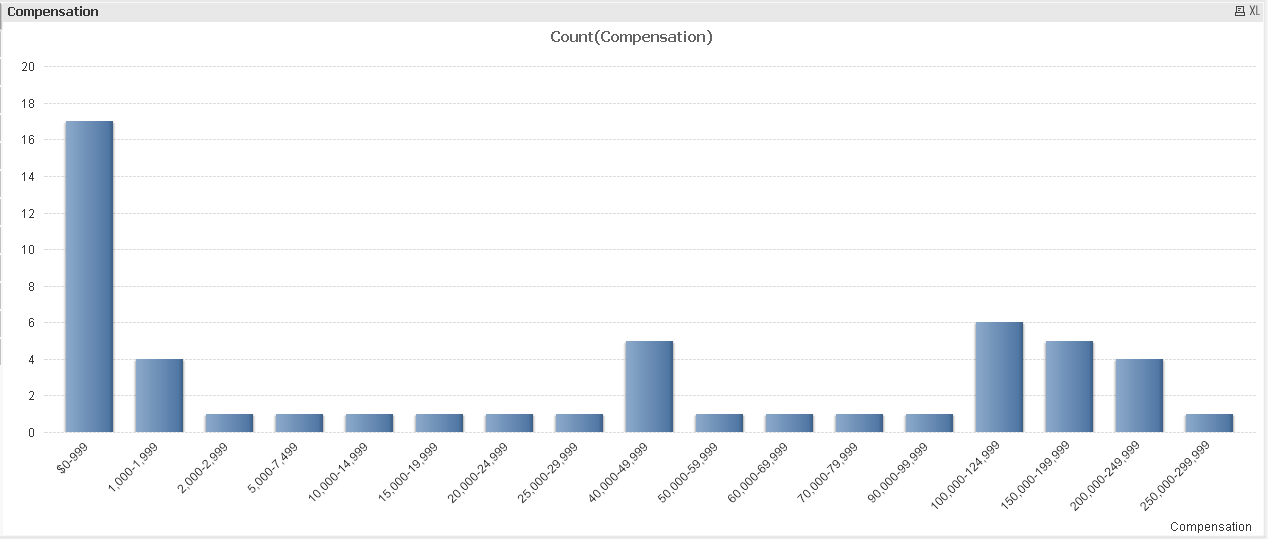

В частности, Python имеет примерно такое же распределение:
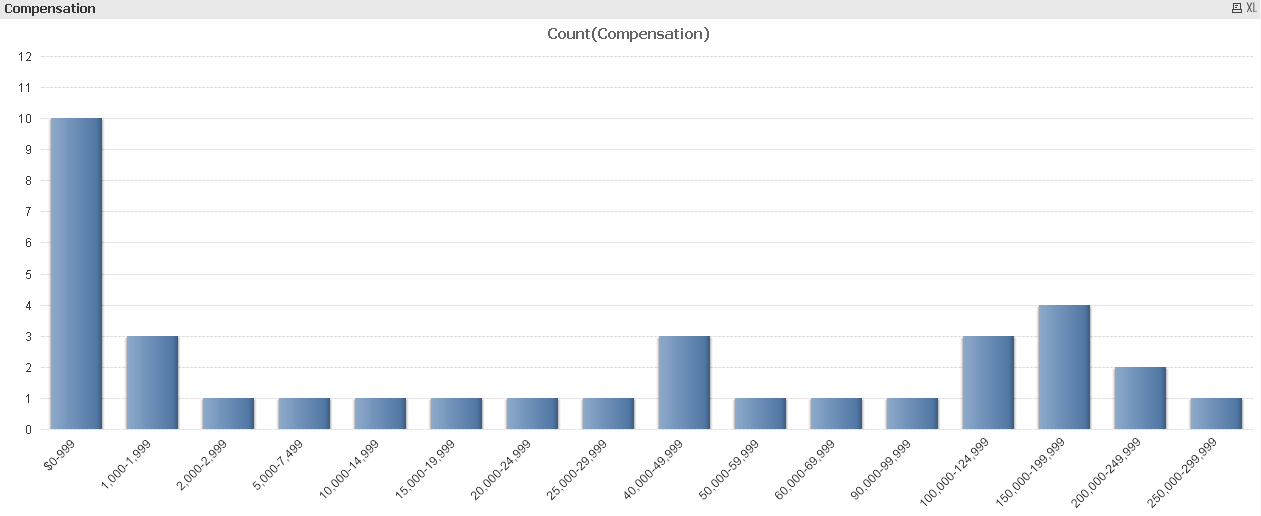

А вот люди за 70, знающие R, имеют в среднем более высокий доход.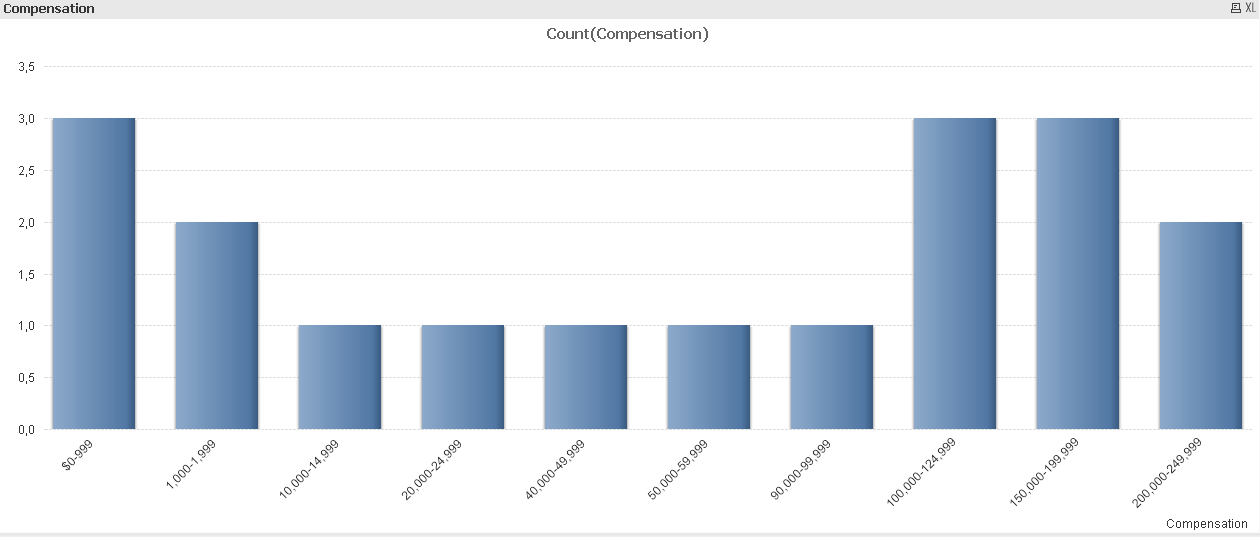

Кроме общего понижения в 2020 видно увеличение разница к 60-70 годам. Уменьшение количества рабочих мест?

В случае 60 лет разница чуть менее заметна, но всё ещё есть

Влияние пола на доход тоже стало интересным примером.
Соответствие среднего дохода мужчин и женщин соответствует средней разнице в доходе в других сферах деятельности в США, в то время, как "небинарные" в среднем зарабатывают гораздо больше. Совпадение?
 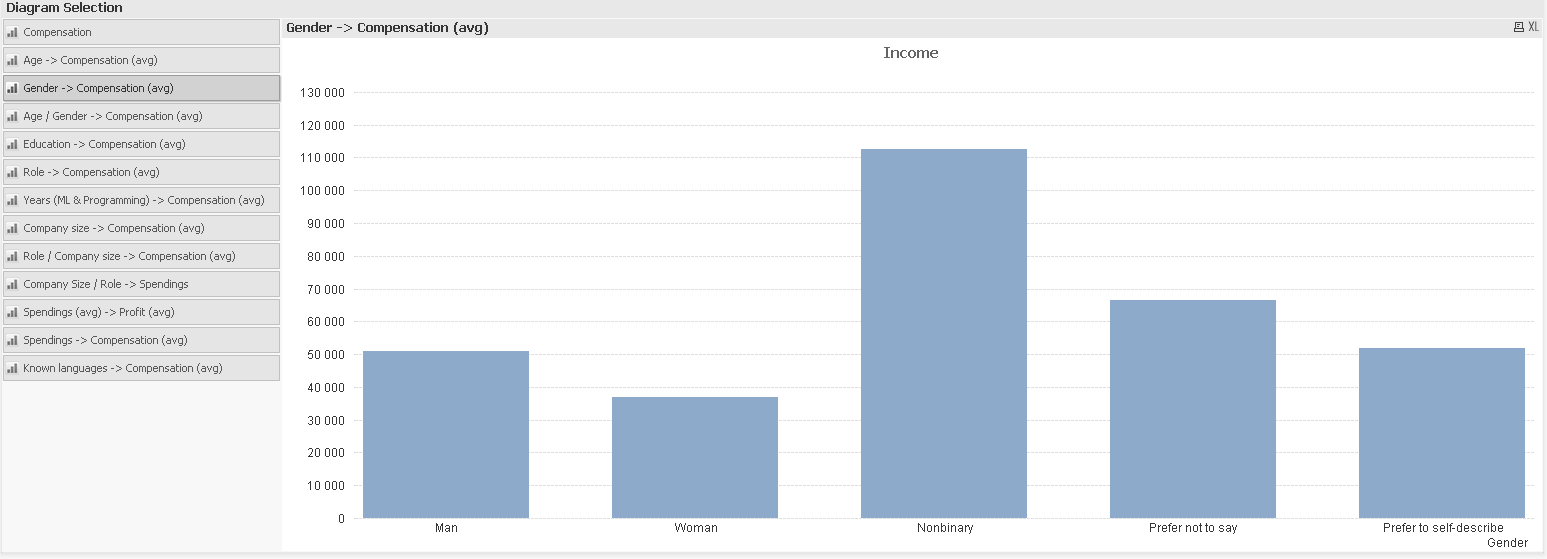

В США разница в доходе уменьшается...
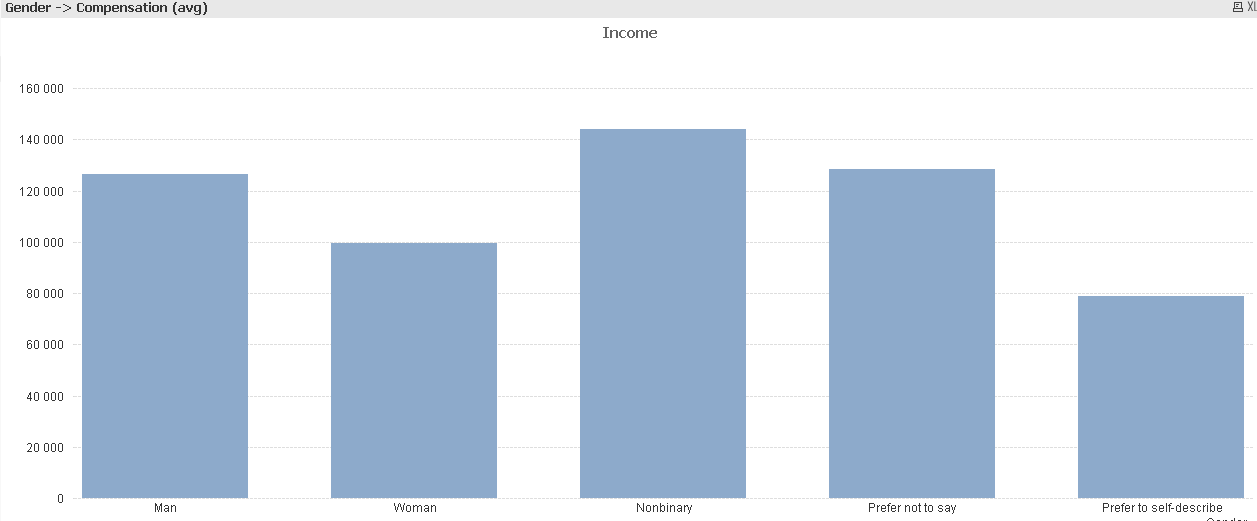

Сравнение по полам для каждого возраста:
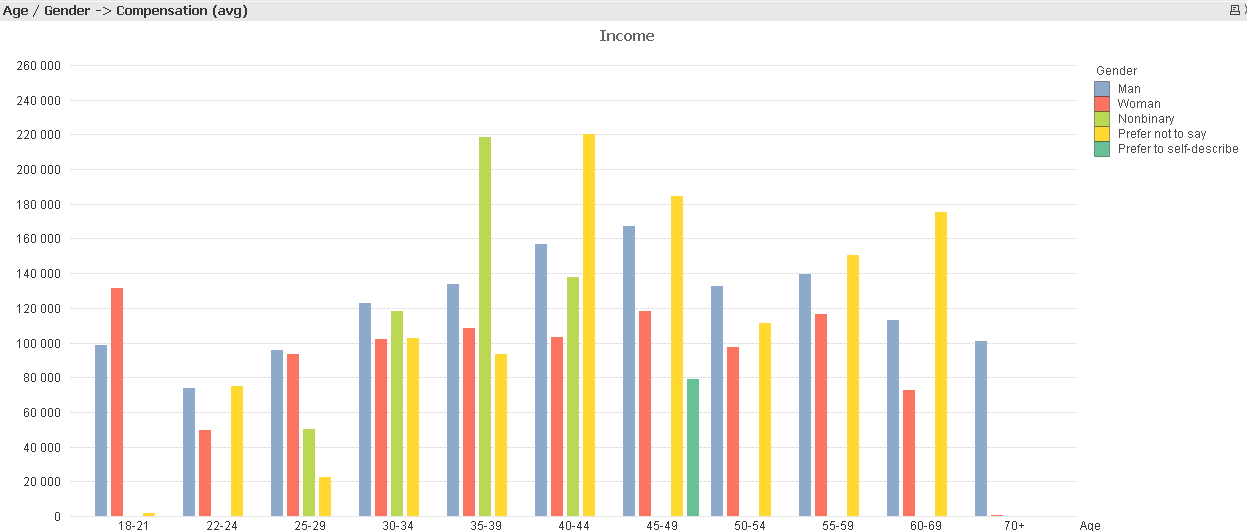

В России, Украине и Беларуси "небинарные" в среднем оплачиваются ниже.
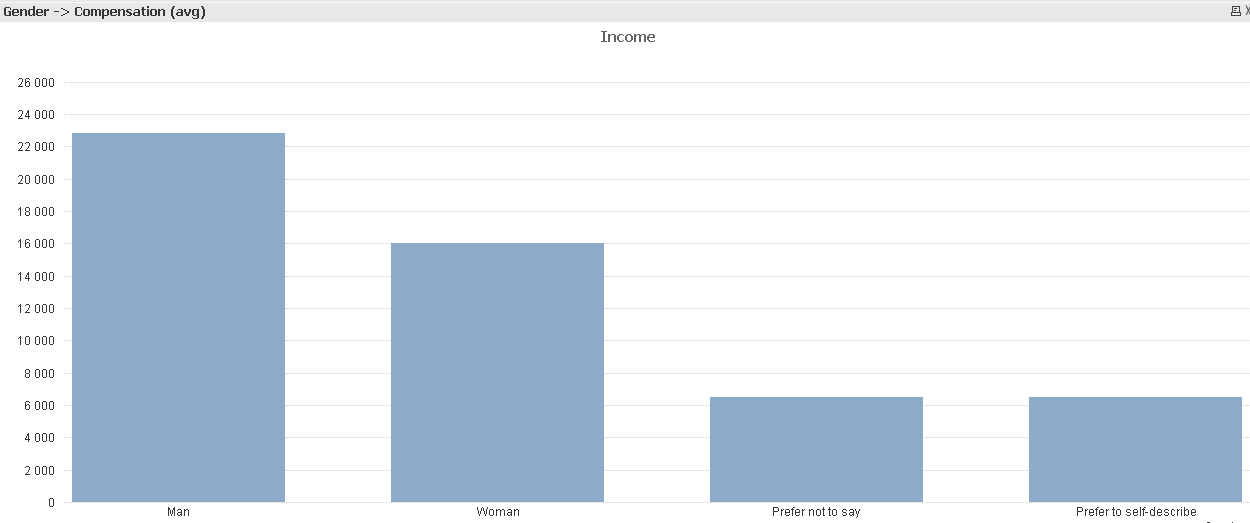

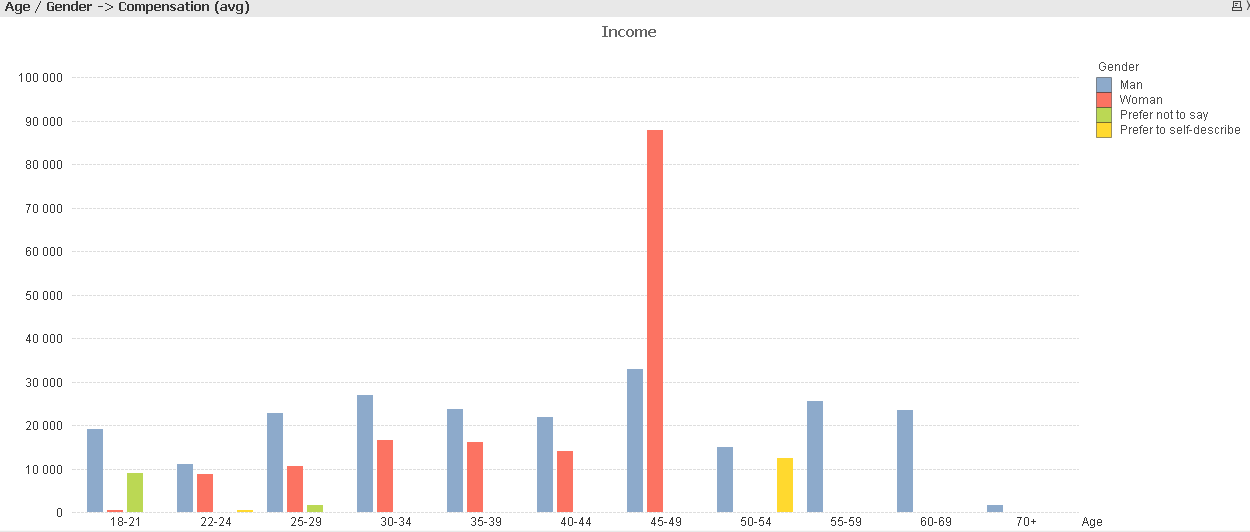

В среднем люди, не окончившие университет, получают даже больше, чем бакалавры. Но доход магистров уже выше, а докторская степень увеличивает преимущество (кто бы мог подумать).
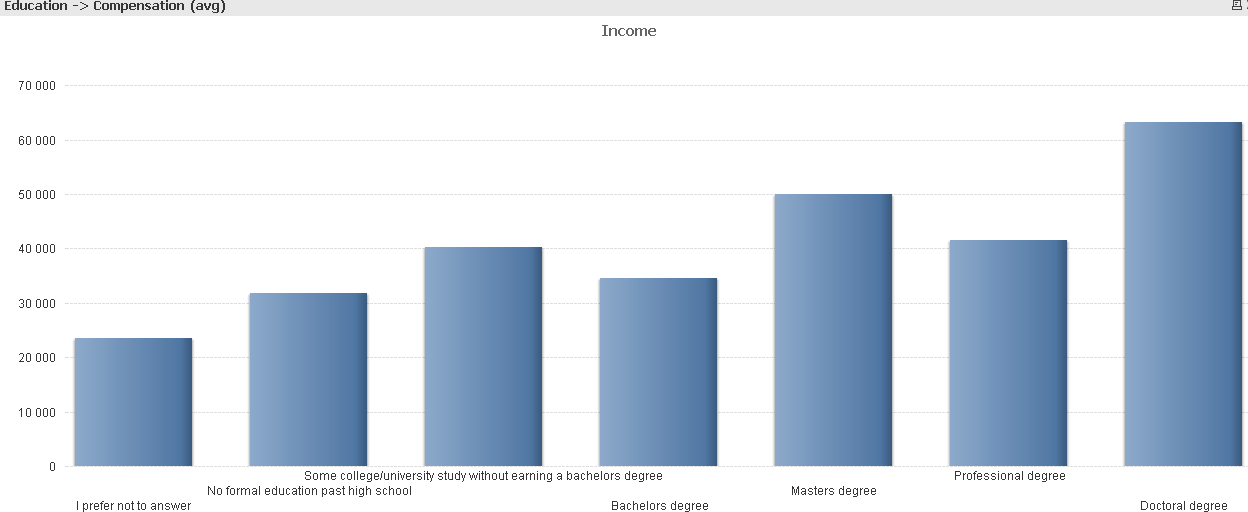

В России без образования никуда: средний доход непрерывно возрастает.
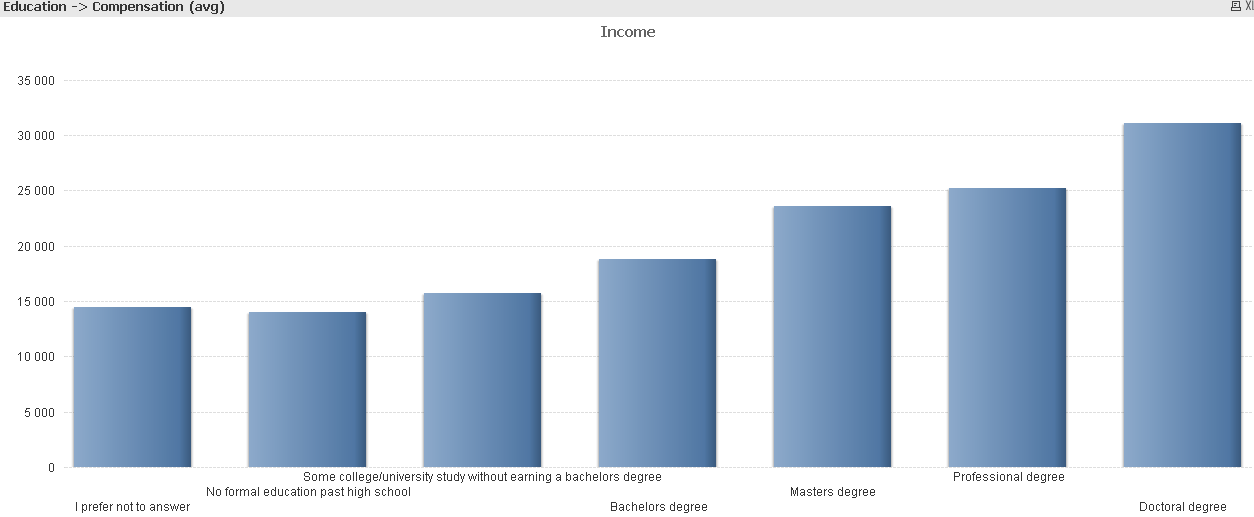

Сравнение с 2019 показало, что сильнее всего потеряли люди без образования

Ниже приведена зависимость дохода от роли/специальности:
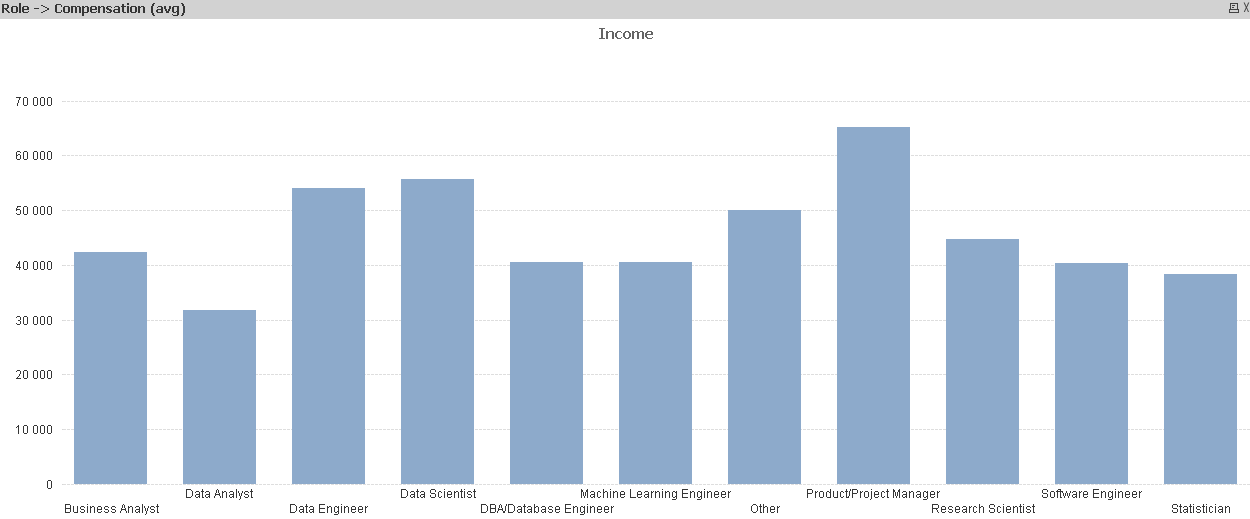

Интересно, что для России ML Engineer оплачивается гораздо выше остальных (видимо, из-за того, что у нас это направление только развивается), а специалист по статистике в опросе участвовал только один.
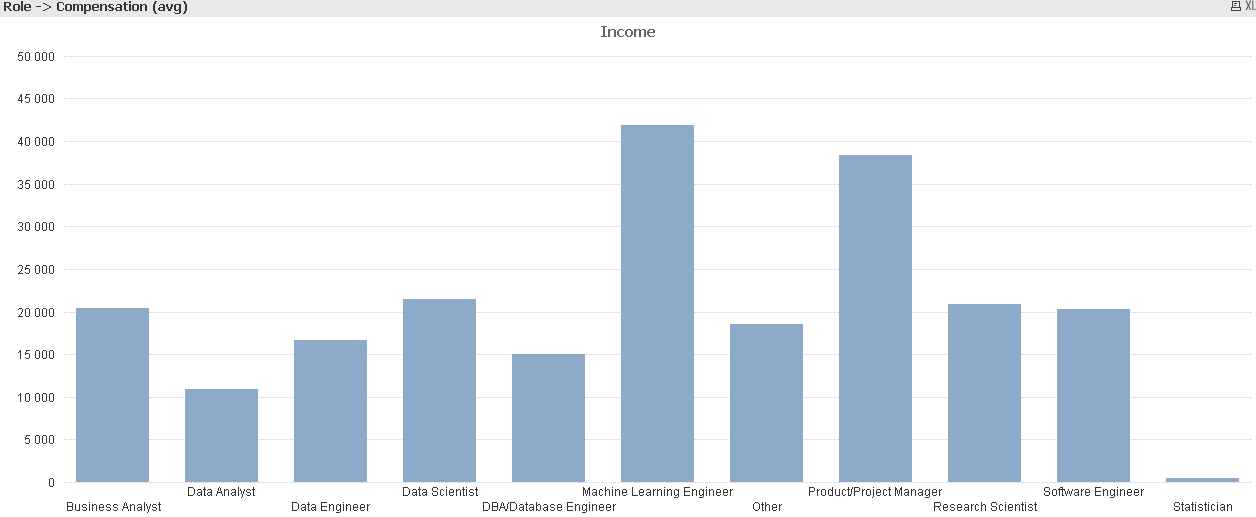

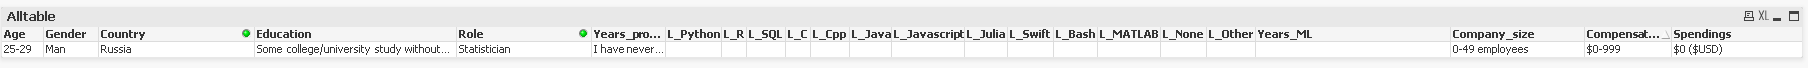

В США, кстати, Product Manager'ы нужны не так сильно, и зарплаты распределены более равномерно.
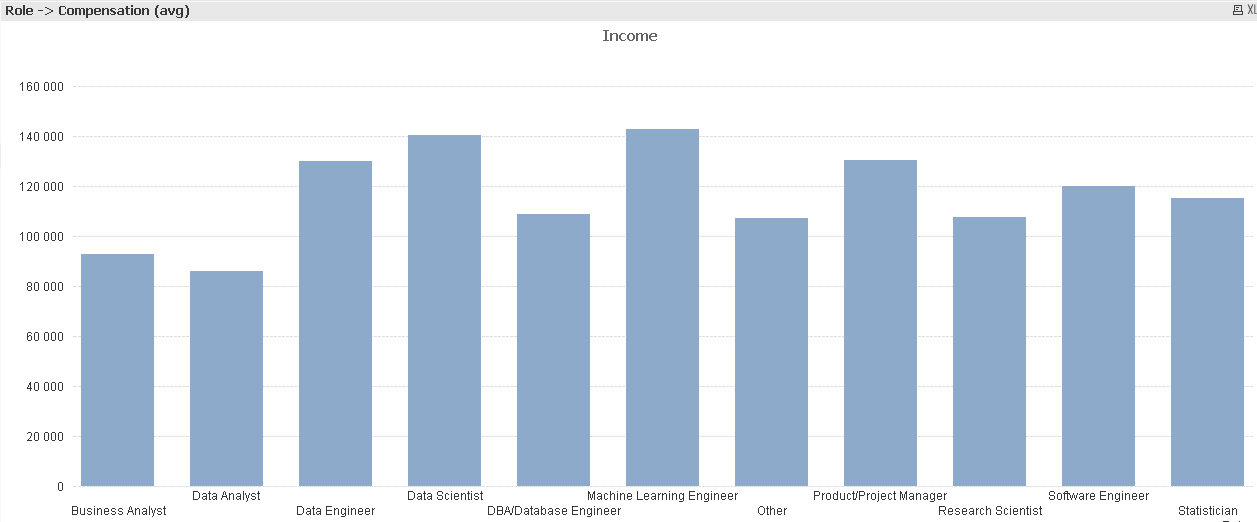


Отчасти данные значения можно обосновать особенностями выборки. НА следующей диаграмме видно, что Statistician и Data Engineer - самые редкие специальности, в то время как ML Engineer'ов больше всего.
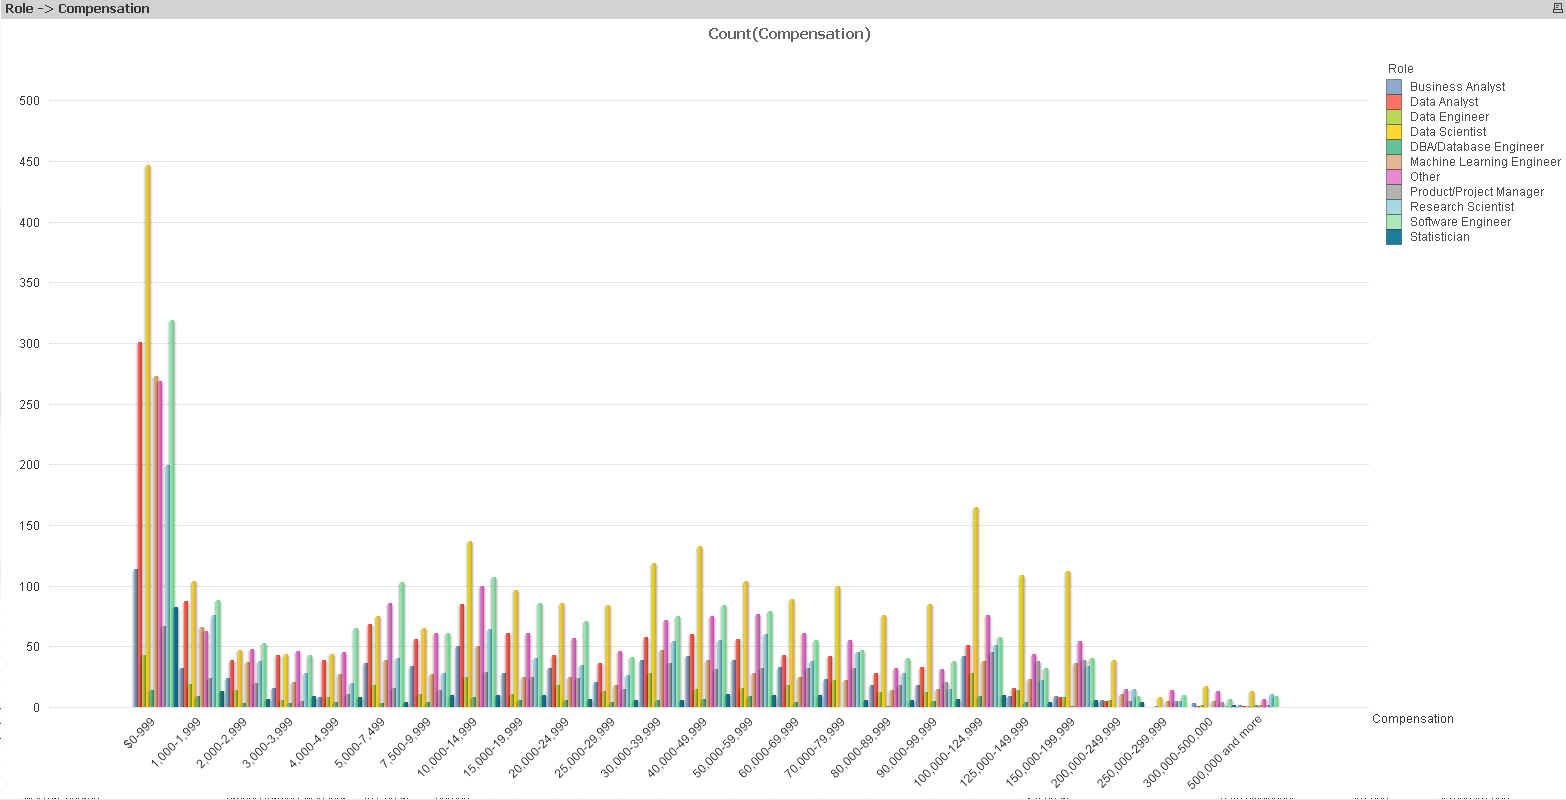

Интересным примером является зависимость дохода от опыта специалистов в программировании и машинном обучении.  Видно, что до 3-5 лет в программировании от опыта почти ничего не зависит, но далее начинается стабильный рост зарплаты. К тому же, с опытом в программировании увеличивается влияние опыта в использовании методов машинного обучения, что хорошо заметно на "5-10 years".
Кем же являются люди, не имеющие опыта в программировании, но использовавшие машинное обучение более 20 лет?
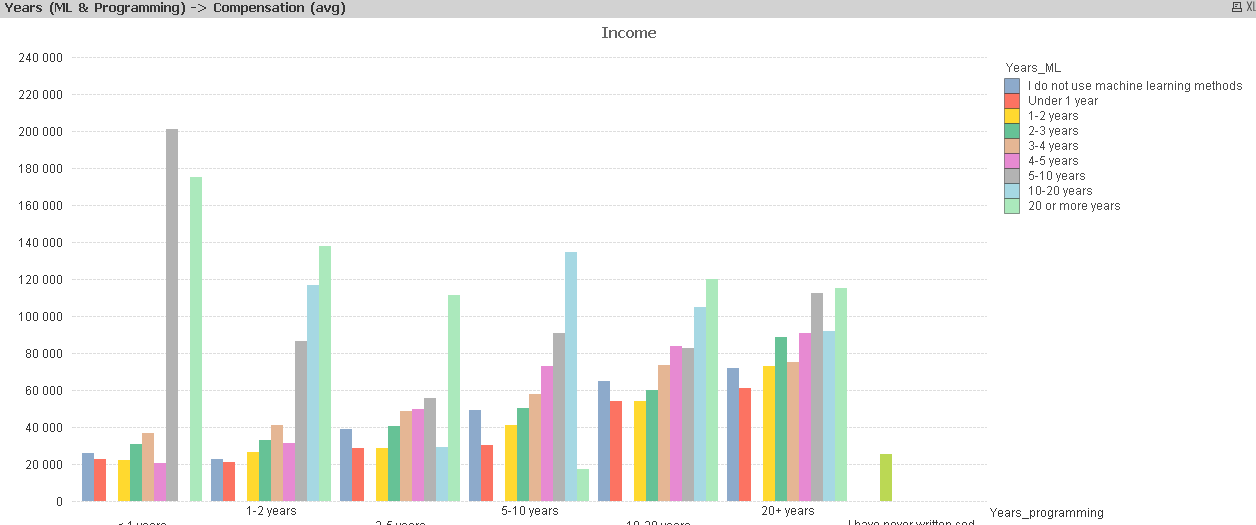

В большинстве стран наблюдается рост доходов сотрудников в зависимости от размера компании.
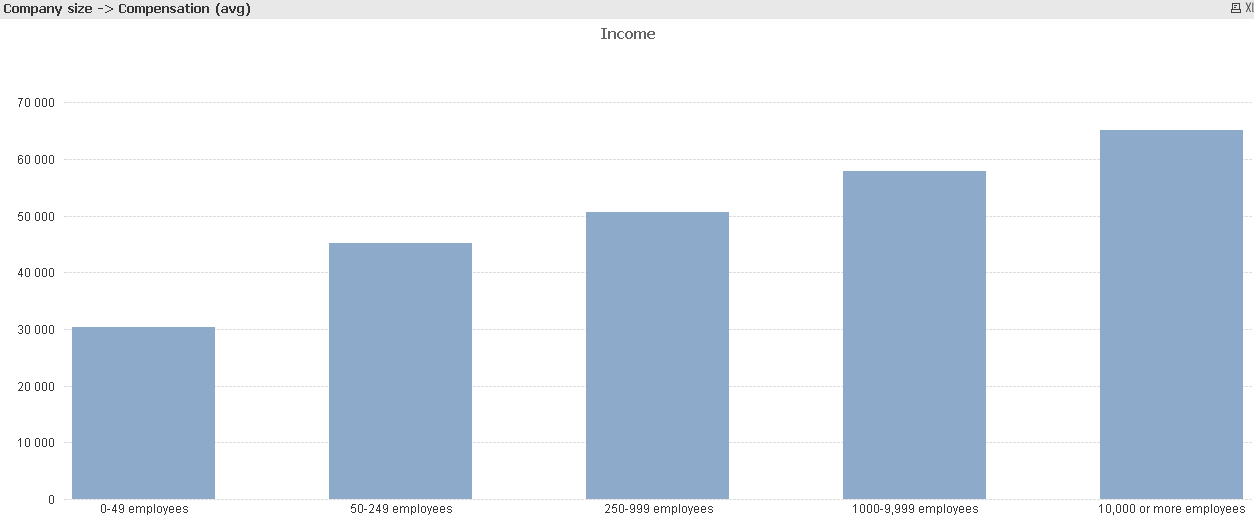

Кроме России. Компании среднего размера платят даже меньше, чем самые маленькие.
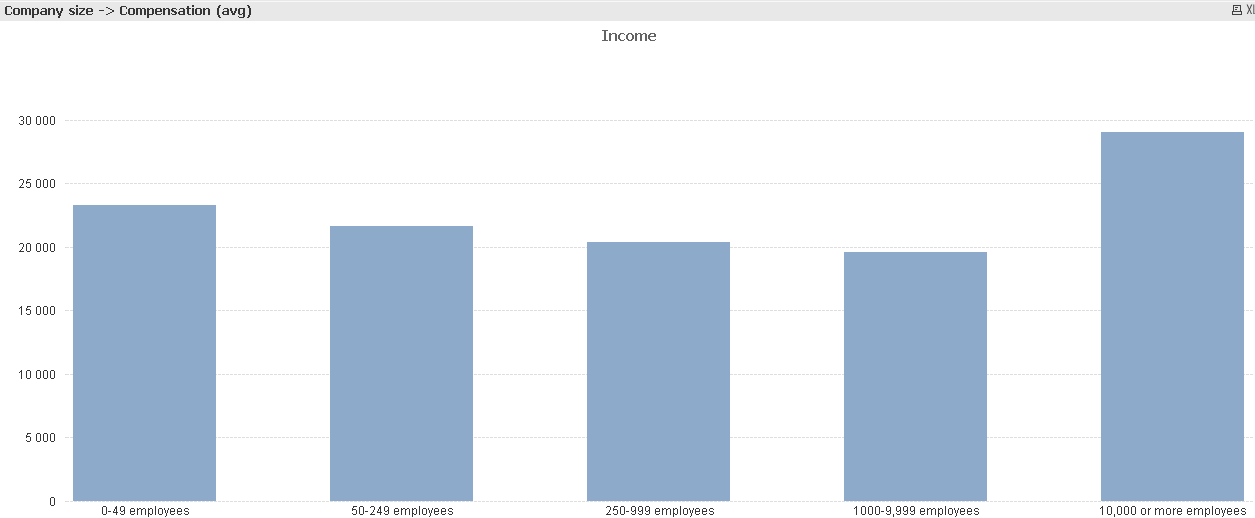

При сравнении размера компании и востребованных специальностей открылись интересные факты.
Так, Data Engineer менее востребован в больших компаниях, чем в средних. А вот Research Scientist - наоборот. Больше всего рост заметен у Statistician - с ростом компании их средние зарплаты меняются от наименьших до наибольших.
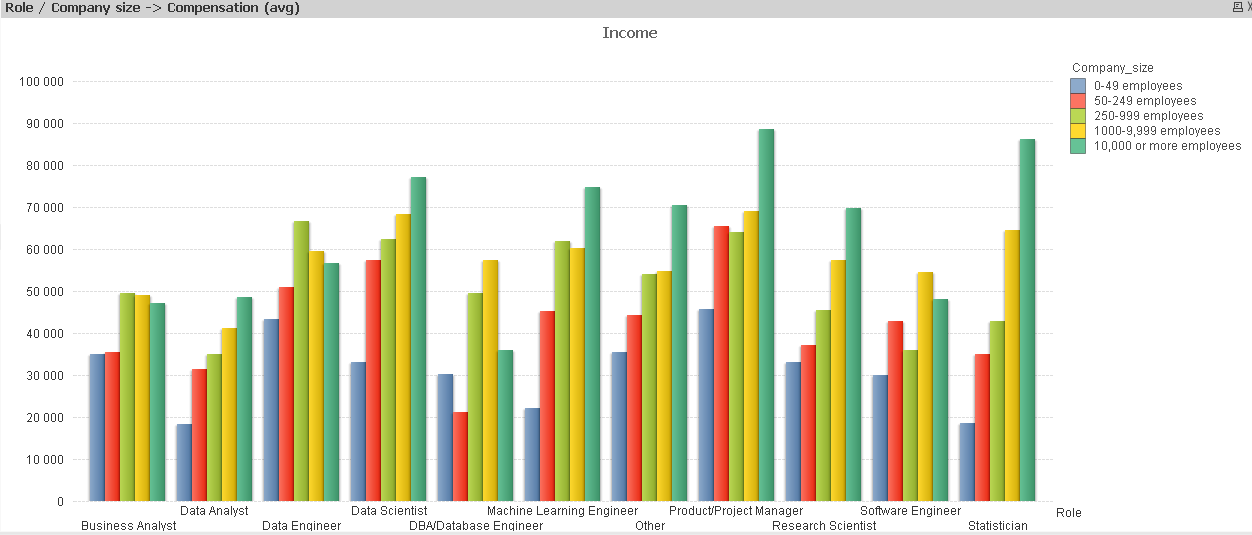

Происходящее в России описать сложно. Скорее всего, такой разброс связан со сравнительно небольшим размером выборки и новизной направления в целом.
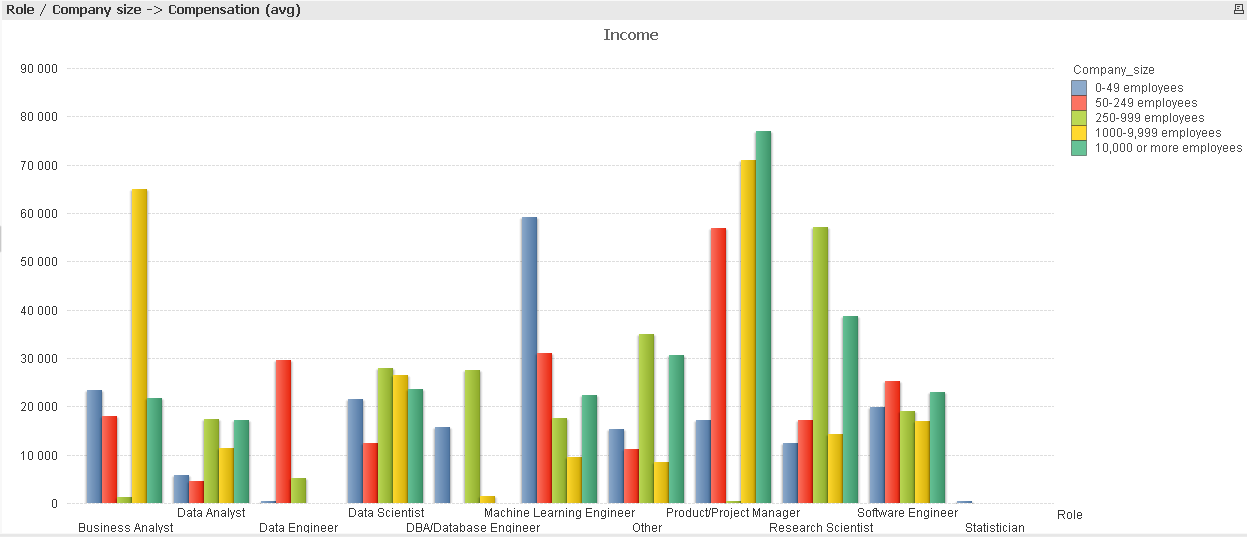

Далее были проанализированы усреднённые расходы участников. Например, большие компании далеко не всегда обеспечивают сотрудников инструментами и зачастую им приходится доставать их "за свой счёт".
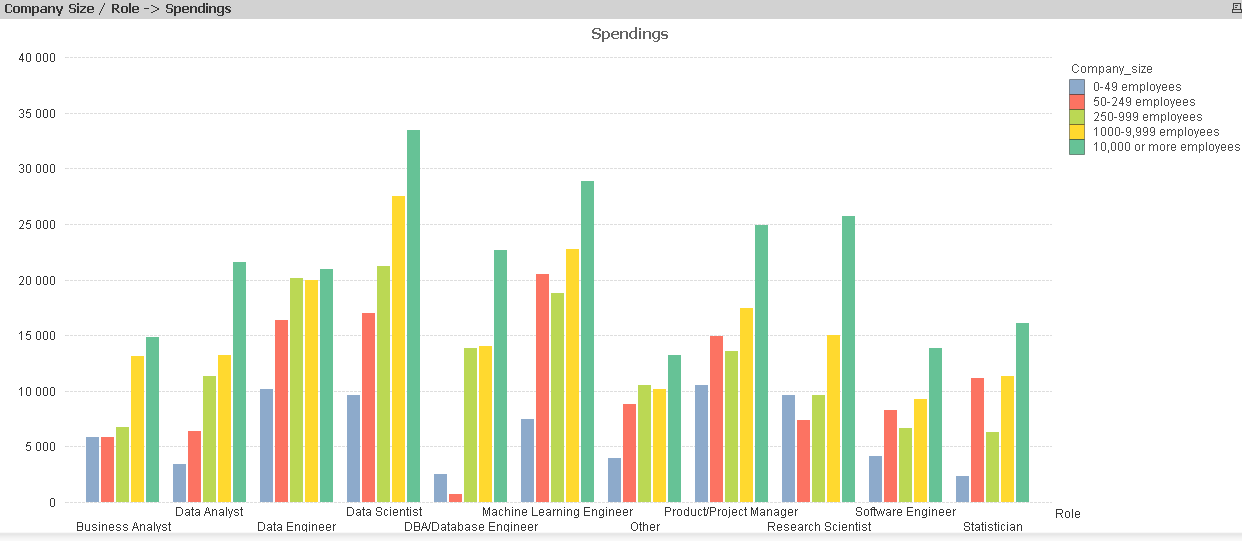

С увеличением расходов наблюдается также и рост доходов. Но насколько велика разника? Наверняка сказать нельзя, так как для обеих величин указываются лишь диапазоны и точно посчитать разницу невозможно. Но даже так видно, что большая часть дохода уходит на инструменты. Таким образом, дорогое ПО и оборудование далеко не всегда ведёт к резкому увеличению прибыли.
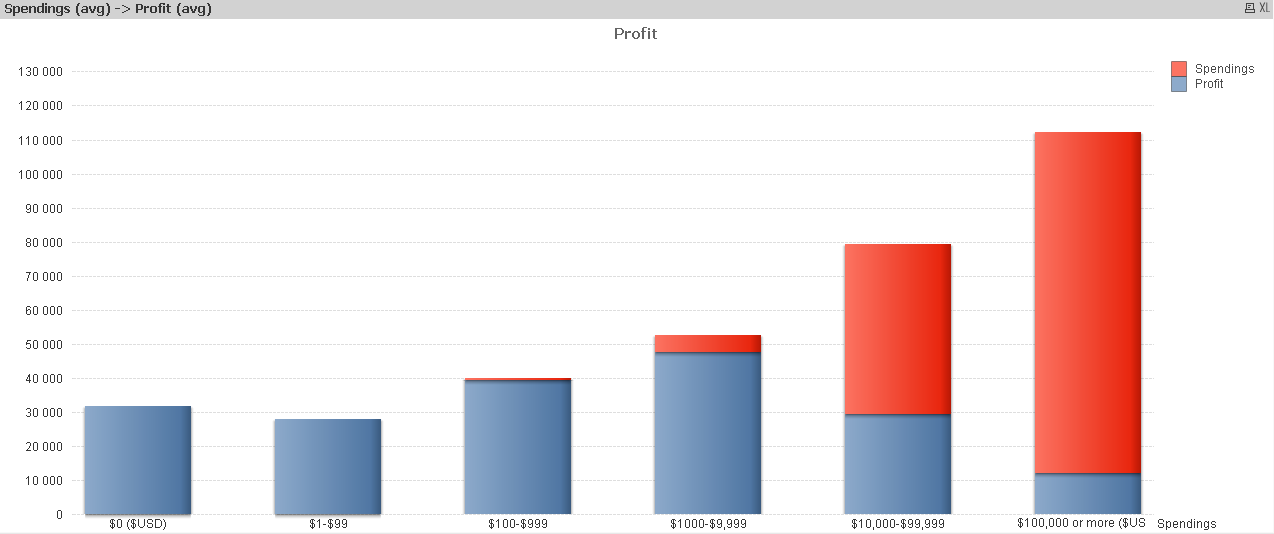

От количества известных работникам языков зависит довольно мало. Последние 2 значения - выбросы.
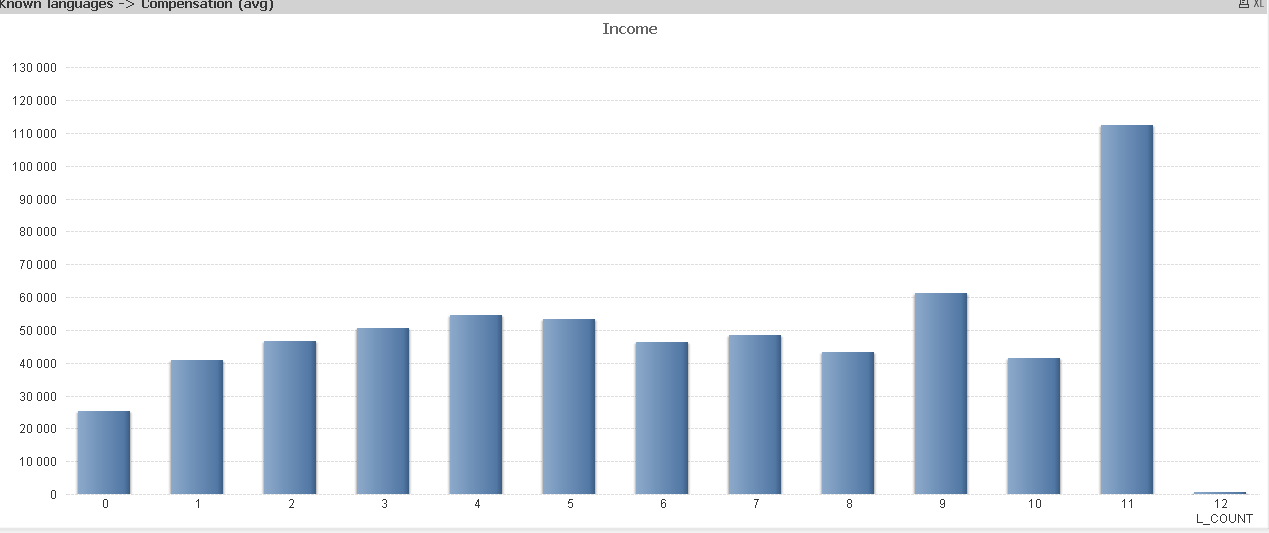
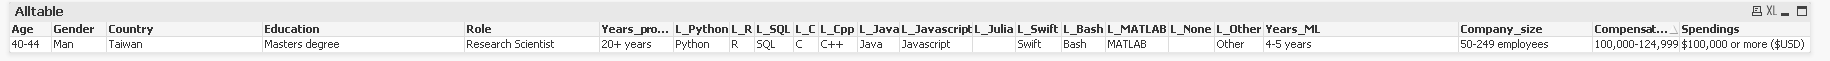
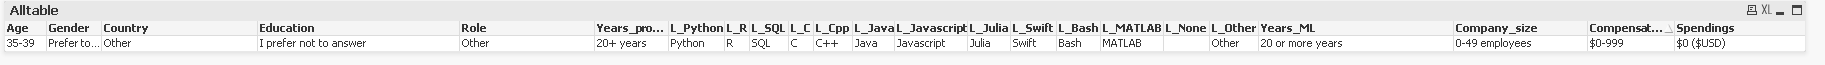

Рассмотрим основные языки. Хорошо видно, что специалистов по Python больше всего. Но распределение зарплат не лучше, чем у остальных языков - колонка "0-999", так же как и у остальных языков, включает большУю часть результатов.
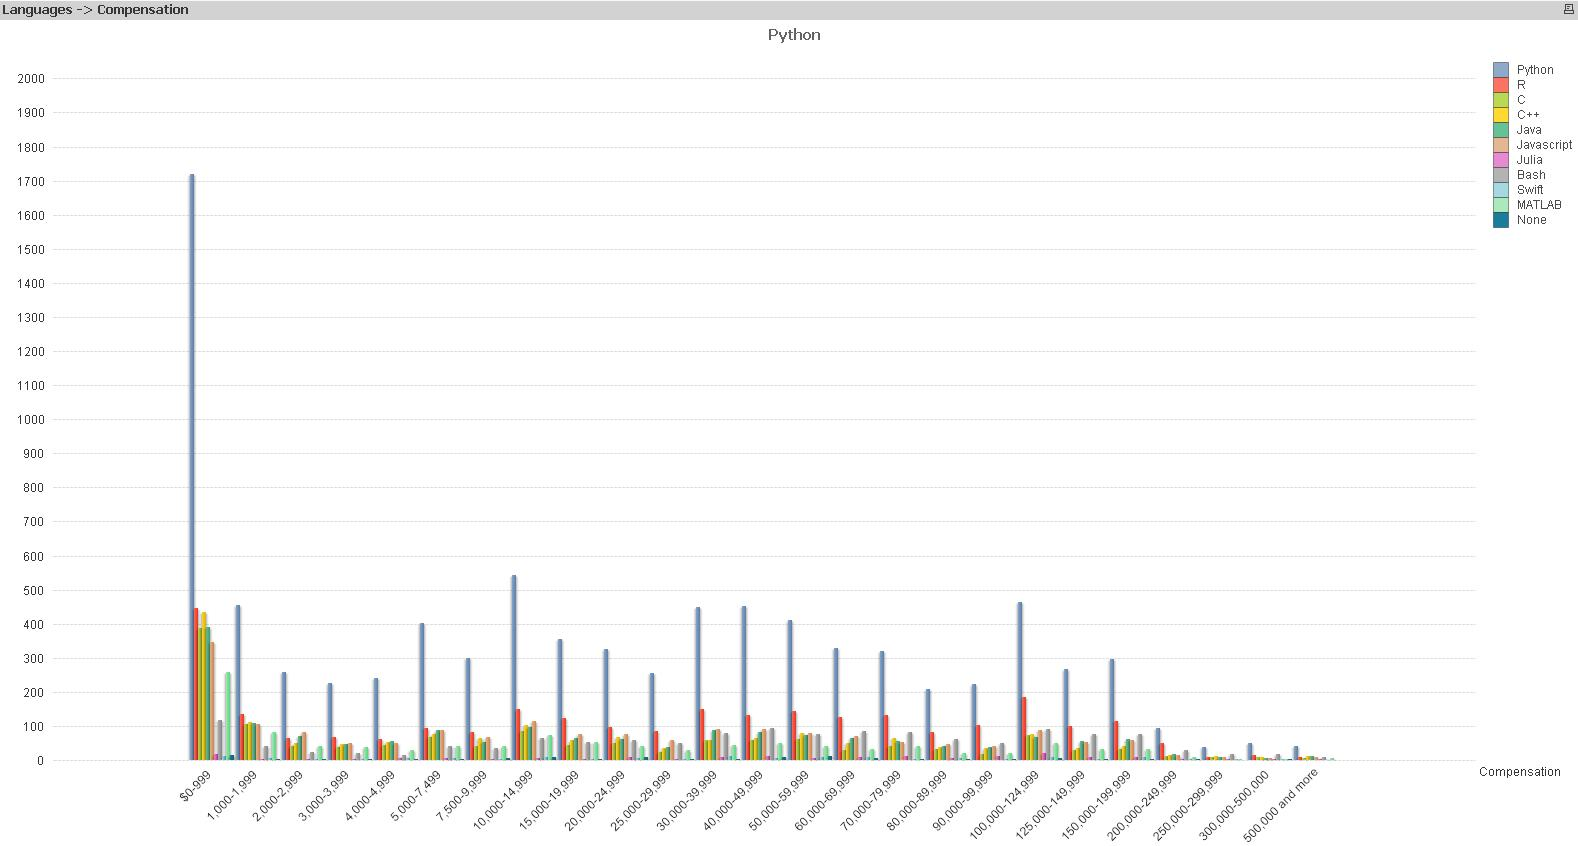

Исключим для наглядности Python.
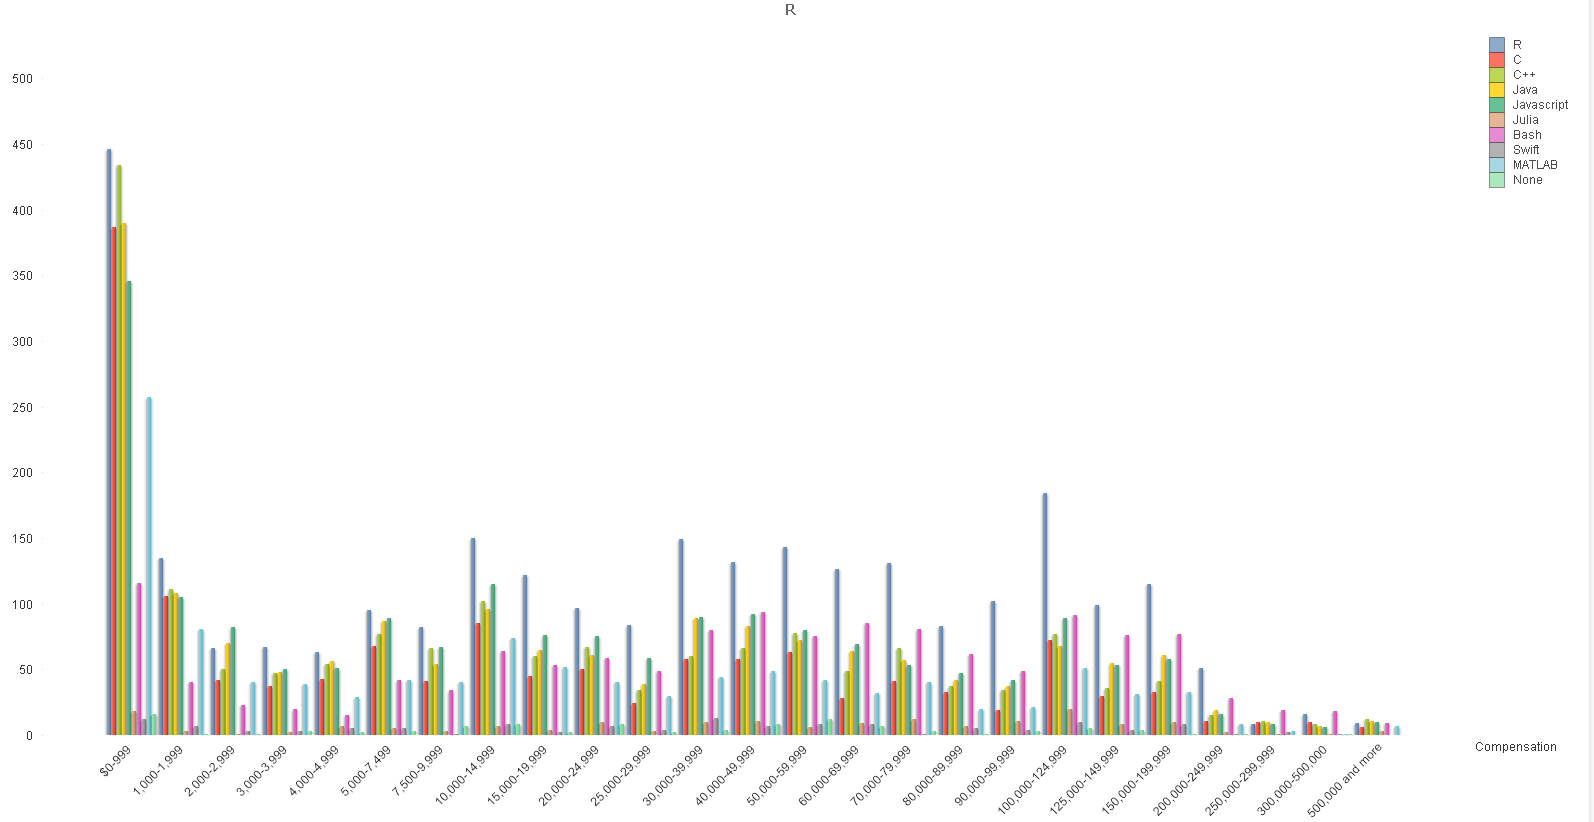

Кривая R в целом повторяет форму кривой для Python. Программисты, знающие SQL, востребованы чуть больше, а C - наоборот. То же самое с Java/Javascript. Все эти языки достаточно популярные, поэтому высокий спрос на них отсутствует.

Очень сильно на общем фоне выделяется Julia. Из-за новизны и сравнительной редкости языка специалисты, знающие его, чаще получают высокие зарплаты.
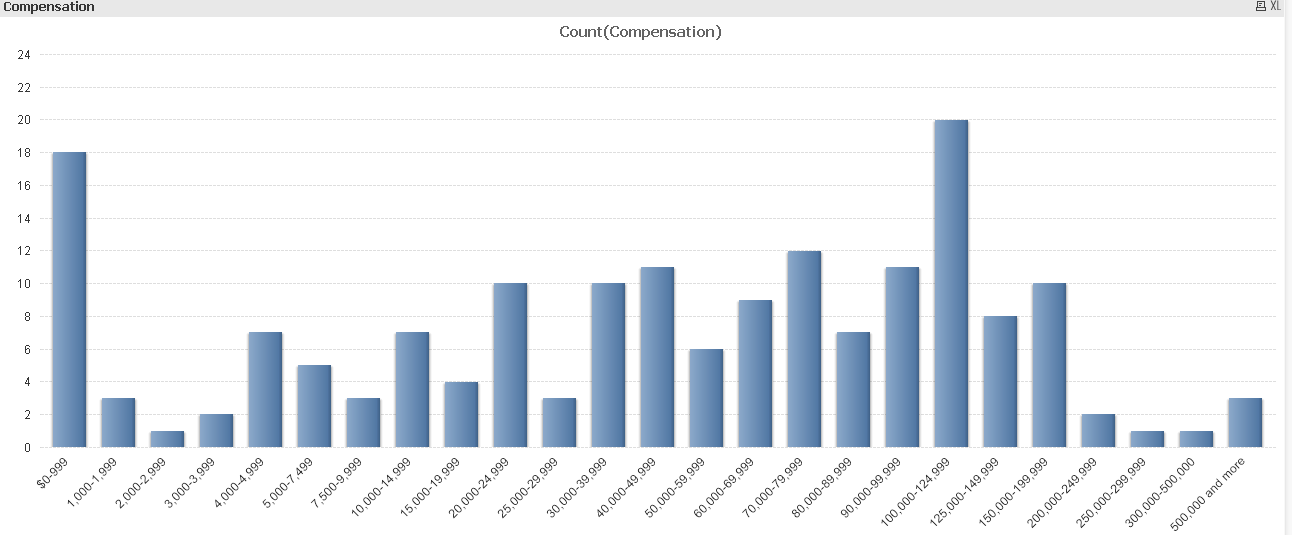

Такая же ситуация с языком Swift.
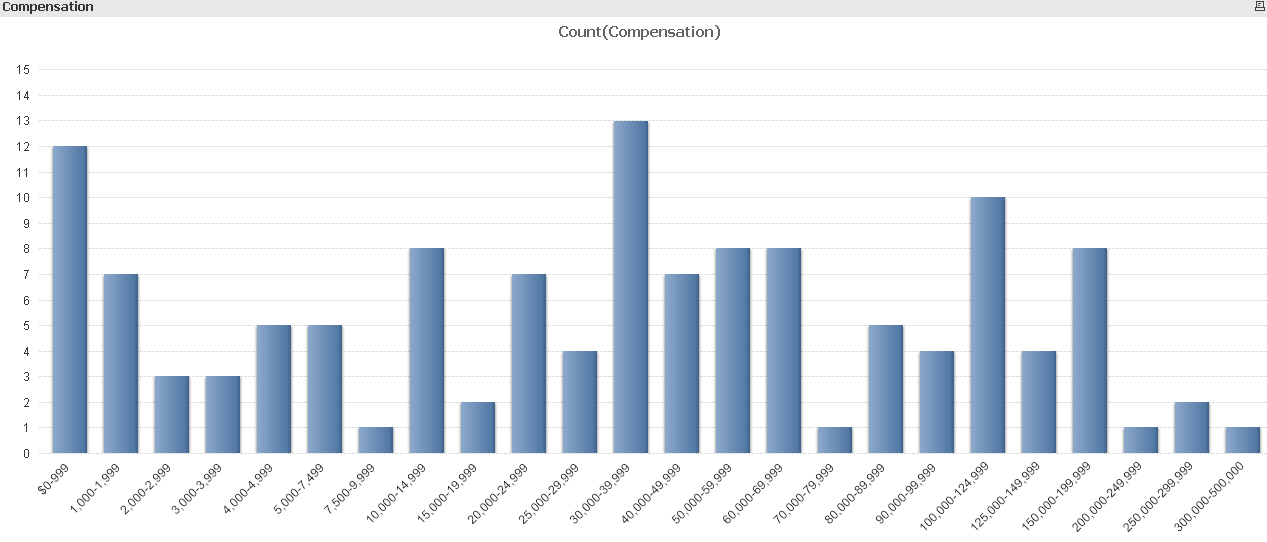

Популярность Bash кажется неожиданной на первый взгляд. Но зачастую специалисты, знающие Bash, обладают более высоким знанием об архитектуре Linux, а следовательно - более эффективно используют её ресурсы.
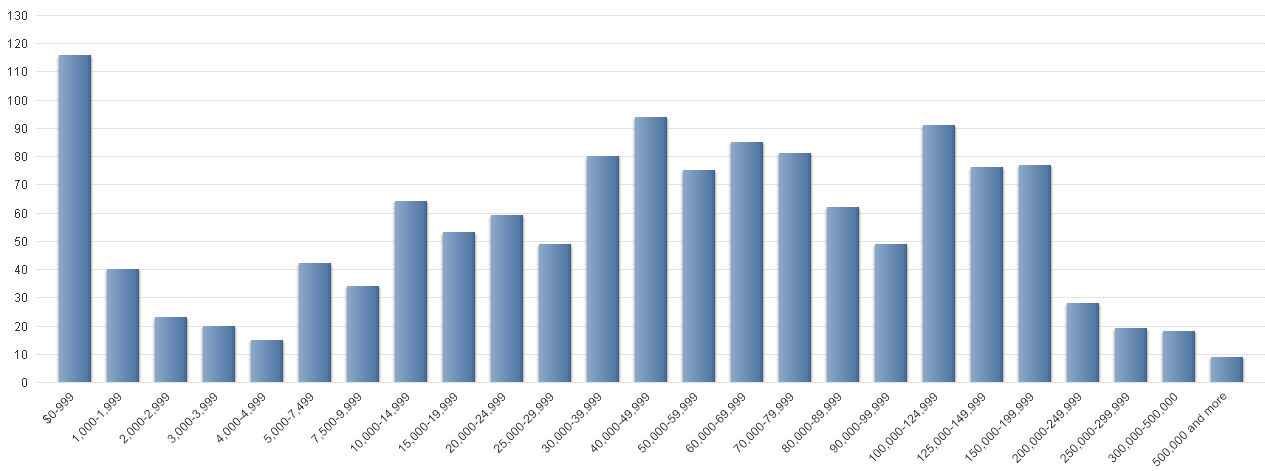

MATLAB повторяет кривую популярных языков.
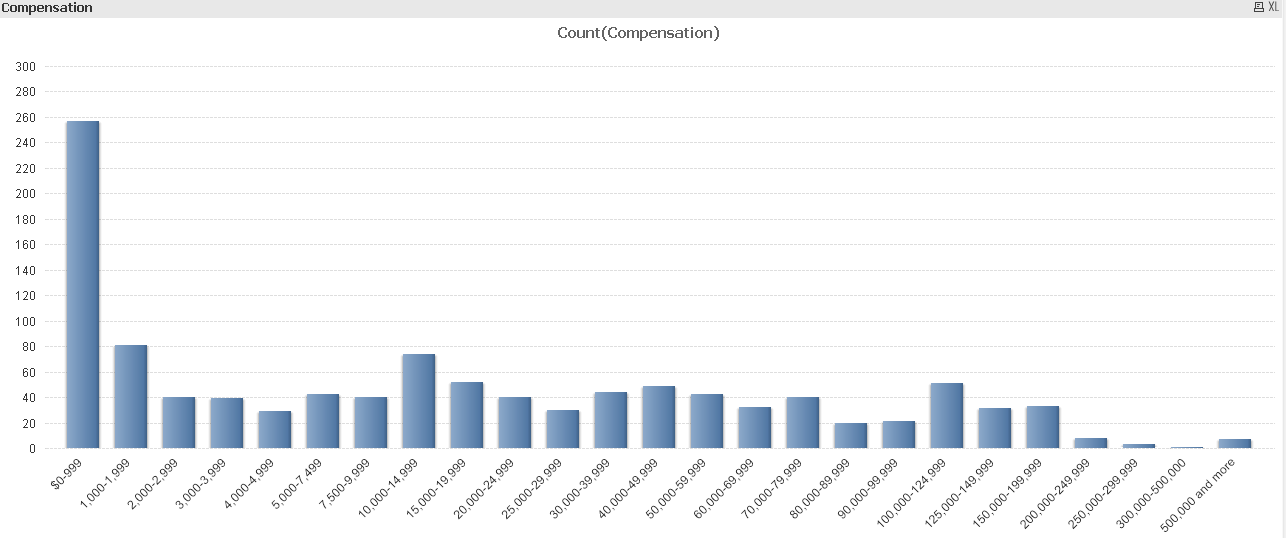

Интересно, что даже люди, не знающие ни одного языка, востребованы. Многие из них относятся к специальности Business/Data Analyst, а большинство имеет совершенно другие, не представленные в опросе роли.
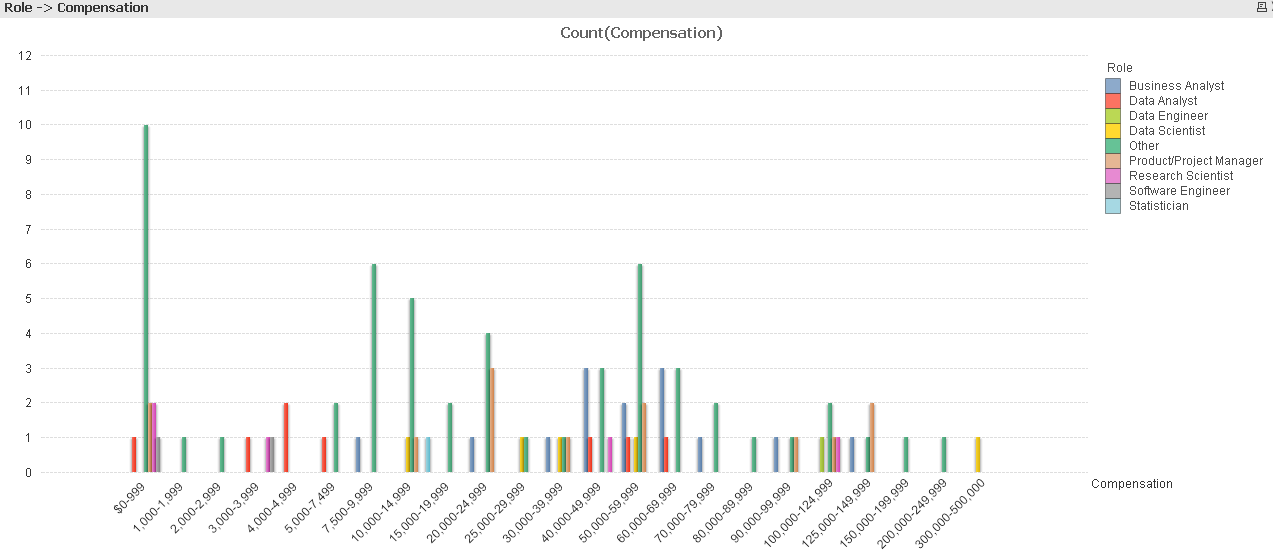